# GLOBAL POWER PLANT ANALYSIS

![Power Plants](powerlines_snapshot.jpg)

***
Notebook Authors:

  [David Ambani](https://github.com/bulemi2)<br>
  [Cynthia Kareko](https://github.com/karekocyn)<br>
  [Joy Wangui](https://github.com/carfew001)<br>
  [Emmanuel Rono](https://github.com/marttech26)<br>

***

## 1. PROJECT OVERVIEW

### (a) Introduction

Exploring the landscape of global power plants, this project assumes a pivotal role in unraveling intricate patterns, discerning trends, and extracting valuable insights. The primary objective is to furnish a holistic comprehension of power plant ownership, fuel types, capacity, generation levels, and the growing significance of renewable energy sources. Employing meticulous analysis and predictive modeling techniques, our aim is to illuminate the historical, current, and future dynamics of global power plants. By doing so, we aspire to offer invaluable insights to stakeholders, shaping the narrative of sustainable energy and contributing to the collective understanding of the global power infrastructure.

 ### (b) Business Understanding

In an era dominated by energy transitions and sustainability concerns, the Global Plant Analysis project aims to unravel the complexities of the worldwide power plant landscape. By investigating ownership patterns, fuel types, and renewable energy contributions, the project seeks to provide a clear snapshot of the global power ecosystem. The insights derived will empower stakeholders, policymakers, and investors with a deeper understanding of the dynamics shaping the energy industry, fostering informed decision-making in an increasingly dynamic and critical sector.

This Global Power Plant Analysis is set to benefit the following stakeholders;

- Power generation companies-Strategic planning
- Environmental Agencies-Providing environmental impact assessment
- Researchers and Academia-Contributing to advancements in energy studies
- Local communities-Informed community engagement
- Technology providers-Market identification and growth opportunities
- Government and Regulatory Bodies-Informed decision making
- Investors and financial institutions-Risk mitigation and informed investments


### (c) Problem Statement

The lack of a comprehensive analysis of the Global Power Plant Database hampers stakeholders' ability to make informed decisions in the evolving energy landscape. There is a need for a systematic exploration of power plant ownership, fuel types, capacity trends, and renewable energy contributions globally. This project addresses the absence of actionable insights, hindering effective decision-making for governments, investors, and energy companies, and aims to provide a clear understanding of the global energy scenario through data-driven analysis.

Our strategic approach involves delving into the complexities of data preprocessing, thoughtful model selection, and the establishment of robust evaluation metrics. This comprehensive methodology seeks to provide a detailed exploration of the global energy scenario, enabling stakeholders to make well-informed decisions in a rapidly transforming sector. The ultimate goal is to fill the void in actionable insights, fostering informed decision-making and facilitating a deeper understanding of the intricate dynamics shaping the global power infrastructure.

### (d) Research Questions

- What are the prevailing patterns and trends in global power plant ownership, and how do these patterns vary across different regions and continents? <br>

- How has the distribution of fuel types evolved over time in the global power plant landscape, and what factors contribute to the shifts in reliance on different energy sources?<br>

- What is the correlation between power plant capacity and the geographical characteristics of different regions globally? How do these correlations influence energy production and consumption patterns?<br>

- To what extent has the adoption of renewable energy sources impacted the overall energy mix, and what are the key challenges and opportunities associated with integrating renewable technologies into the global power infrastructure?<br>

### (e) The Main Objective

- To develop a predictive model leveraging the analysis of the Global Power Plant Database to accurately forecast the power generation of power plants.

#  to predict the capacity of a power plant (capacity_mw)
# to classify power plants into different categories (e.g., renewable vs. non-renewable) based on similar features
# to recommend power plants based on their capacity, fuel type, location

### (f) The Specific Objectives


Specific Objectives

- Investigate the geographic distribution of power plants globally to identify regional disparities and potential gaps in energy infrastructure.
- Analyze the ownership patterns of power plants to understand the landscape of key stakeholders and identify areas with opportunities for investment or collaboration.
- Examine the capacity distribution of power plants to identify trends and variations in energy production capabilities across different regions.
- Explore the correlation between fuel types and power plant efficiency to identify areas where transitioning to more sustainable energy sources can be optimized.
- Investigate the distribution of renewable energy contributions across various power plants to assess the global impact of sustainable practices in the energy sector.

### (g) Data Understanding

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type.

The dataset contains the following columns with their descriptions:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [4]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `fuel (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_ (number): electricity generation in gigawatt-hours reported
- `estimated_generation_gwh` (number): estimated annual electricity generation in gigawatt-hours

The database is available for immediate download and use through the http://datasets.wri.org/dataset/globalpowerplantdatabase

**Importing libraries**

In [1]:
# Data manipulation and analysis
import pandas as pd  

# Creating visualizations
import matplotlib.pyplot as plt  

# Statistical data visualization
import seaborn as sns  

# Numerical operations
import numpy as np  

# Working with geospatial data
from geopy.distance import great_circle
import geopandas as gpd

# Handling date and time information
import datetime as dt  

# Mathematical functions
import math  

# Importing from functions.py
from functions import plot_top_n, plot_top_and_bottom_countries_by_capacity, plot_capacity_generation_scatter, plot_power_plant_distribution

# Importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

## 2. Data Cleaning

In [2]:
# Read CSV file into data frame
df = pd.read_csv('global_power_plant_database.csv')

In [3]:
#Check the first few rows of the DataFrame
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [4]:
# Display the shape of the DataFrame
df.shape

(34936, 36)

This indicates that the DataFrame comprises 34,936 rows and 36 columns. Each row corresponds to an individual power plant, and the columns represent the characteristics or attributes associated with these interactions.

In [5]:
#Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [6]:
# Display descriptive statistics of the DataFrame
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,17447.000000,14887.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000
mean,163.355148,32.816637,-6.972803,1997.414823,2018.218849,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,239.112221,242.431122,235.866067,235.695265,716.443378
std,489.636072,22.638603,78.405850,23.397835,1.606428,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200
min,1.000000,-77.847000,-179.977700,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,1988.000000,2017.000000,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500,8.620000,8.680000,8.380000,8.322500,8.180000
50%,16.745000,39.727750,-2.127100,2007.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,2014.000000,2019.000000,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498,106.805000,106.980000,103.120000,107.237500,229.565000
max,22500.000000,71.292000,179.388700,2020.000000,2019.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


In [7]:
#Check the unique values in each column
df.nunique()

country                             167
country_long                        167
name                              34528
gppd_idnr                         34936
capacity_mw                        5611
latitude                          31779
longitude                         33036
primary_fuel                         15
other_fuel1                          12
other_fuel2                          11
other_fuel3                           8
commissioning_year                 2023
owner                             10144
source                              866
url                                4870
geolocation_source                   28
wepp_id                           15263
year_of_capacity_data                11
generation_gwh_2013                5458
generation_gwh_2014                6159
generation_gwh_2015                7037
generation_gwh_2016                7671
generation_gwh_2017                7974
generation_gwh_2018                7946
generation_gwh_2019                8327


In [8]:
df.isna().sum()

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


In [9]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

In [10]:
#dropping columns with nulls

In [11]:
selected_columns = [
    'country_long',
    'name',
    'capacity_mw',
    'primary_fuel',
    'latitude', 
    'longitude'
]

In [12]:
global_df = df[selected_columns]
global_df.head(10)

,country_long,name,capacity_mw,primary_fuel,latitude,longitude
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.00,Hydro,32.3220,65.1190
1,Afghanistan,Kandahar DOG,10.00,Solar,31.6700,65.7950
2,Afghanistan,Kandahar JOL,10.00,Solar,31.6230,65.7920
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.00,Hydro,34.5560,69.4787
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.00,Hydro,34.6410,69.7170
5,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,11.55,Hydro,34.4847,70.3633
6,Afghanistan,Northwest Kabul Power Plant Afghanistan,42.00,Gas,34.5638,69.1134
7,Afghanistan,Pul-e-Khumri Hydroelectric Power Plant Afghani...,6.00,Hydro,35.9416,68.7100
8,Afghanistan,Sarobi Dam Hydroelectric Power Plant Afghanistan,22.00,Hydro,34.5865,69.7757
9,Albania,Bistrica 1,27.00,Hydro,39.9116,20.1047


In [13]:
global_df.shape

(34936, 6)

In [14]:
unique_fuels = np.unique(global_df['primary_fuel'].values)
unique_fuels

array(['Biomass', 'Coal', 'Cogeneration', 'Gas', 'Geothermal', 'Hydro',
       'Nuclear', 'Oil', 'Other', 'Petcoke', 'Solar', 'Storage', 'Waste',
       'Wave and Tidal', 'Wind'], dtype=object)

In [15]:
# Check for Missing Values in global_df
global_df.isna().sum()

country_long    0
name            0
capacity_mw     0
primary_fuel    0
latitude        0
longitude       0
dtype: int64

There are no missing values in our dataframe.

In [16]:
# Rename the 'country_long' column to 'country' and 'name' to 'plant name'
global_df.rename(columns={'country_long': 'country', 'name' : 'plant name'}, inplace=True)

In [17]:
#Get a concise summary of df_cleaned
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       34936 non-null  object 
 1   plant name    34936 non-null  object 
 2   capacity_mw   34936 non-null  float64
 3   primary_fuel  34936 non-null  object 
 4   latitude      34936 non-null  float64
 5   longitude     34936 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.6+ MB


In [18]:
global_df.columns

Index(['country', 'plant name', 'capacity_mw', 'primary_fuel', 'latitude',
       'longitude'],
      dtype='object')

In [19]:
global_df

,country,plant name,capacity_mw,primary_fuel,latitude,longitude
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,Hydro,32.3220,65.1190
1,Afghanistan,Kandahar DOG,10.0,Solar,31.6700,65.7950
2,Afghanistan,Kandahar JOL,10.0,Solar,31.6230,65.7920
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,Hydro,34.5560,69.4787
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,Hydro,34.6410,69.7170
...,...,...,...,...,...,...
34931,Zambia,Ndola,50.0,Oil,-12.9667,28.6333
34932,Zambia,Nkana,20.0,Oil,-12.8167,28.2000
34933,Zambia,Victoria Falls,108.0,Hydro,-17.9167,25.8500
34934,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.0,Coal,-18.3835,26.4700


### Feature Engineering

In [20]:
# Country Statistics
country_stats = global_df.groupby('country').agg({
    'plant name': 'count',
    'capacity_mw': ['mean', 'sum']
}).reset_index()
country_stats.columns = ['country','num_plants', 'avg_capacity', 'total_capacity']

In [21]:
country_stats.isna().sum()

country           0
num_plants        0
avg_capacity      0
total_capacity    0
dtype: int64

In [22]:
country_stats

,country,num_plants,avg_capacity,total_capacity
0,Afghanistan,9,33.394444,300.550
1,Albania,8,191.125000,1529.000
2,Algeria,59,269.047458,15873.800
3,Angola,14,76.512857,1071.180
4,Antarctica,2,3.800000,7.600
...,...,...,...,...
162,Vietnam,236,175.213941,41350.490
163,Western Sahara,1,23.400000,23.400
164,Yemen,7,149.285714,1045.000
165,Zambia,15,179.289133,2689.337


In [23]:
country_stats[country_stats['country'] == 'Kenya']

,country,num_plants,avg_capacity,total_capacity
78,Kenya,23,108.082609,2485.9


We are on the right track as currently kenyas total capacity has just crossed 3000MW mark

In [24]:
# Plant Name Length
global_df['plant_name_length'] = global_df['plant name'].apply(len)
global_df

,country,plant name,capacity_mw,primary_fuel,latitude,longitude,plant_name_length
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,Hydro,32.3220,65.1190,44
1,Afghanistan,Kandahar DOG,10.0,Solar,31.6700,65.7950,12
2,Afghanistan,Kandahar JOL,10.0,Solar,31.6230,65.7920,12
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,Hydro,34.5560,69.4787,45
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,Hydro,34.6410,69.7170,48
...,...,...,...,...,...,...,...
34931,Zambia,Ndola,50.0,Oil,-12.9667,28.6333,5
34932,Zambia,Nkana,20.0,Oil,-12.8167,28.2000,5
34933,Zambia,Victoria Falls,108.0,Hydro,-17.9167,25.8500,14
34934,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.0,Coal,-18.3835,26.4700,32


In [30]:
# Fuel Type Encoding (One-Hot Encoding)
# 3. Fuel Type Encoding (One-Hot Encoding)
fuel_encoding = pd.get_dummies(global_df['primary_fuel'], drop_first= True, prefix='fuel', dtype=int)


In [31]:
fuel_encoding

,fuel_Coal,fuel_Cogeneration,fuel_Gas,fuel_Geothermal,fuel_Hydro,fuel_Nuclear,fuel_Oil,fuel_Other,fuel_Petcoke,fuel_Solar,fuel_Storage,fuel_Waste,fuel_Wave and Tidal,fuel_Wind
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,0,0,0,0,0,0,1,0,0,0,0,0,0,0
34932,0,0,0,0,0,0,1,0,0,0,0,0,0,0
34933,0,0,0,0,1,0,0,0,0,0,0,0,0,0
34934,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# ALTERNATIVE TO OHE

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
# Distance from Equator
def distance_from_equator(lat):
    return great_circle((lat, 0), (0, 0)).kilometers

global_df['distance_from_equator'] = global_df['latitude'].apply(distance_from_equator)

In [34]:
global_df

,country,plant name,capacity_mw,primary_fuel,latitude,longitude,plant_name_length,distance_from_equator
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,Hydro,32.3220,65.1190,44,3594.047496
1,Afghanistan,Kandahar DOG,10.0,Solar,31.6700,65.7950,12,3521.548302
2,Afghanistan,Kandahar JOL,10.0,Solar,31.6230,65.7920,12,3516.322133
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,Hydro,34.5560,69.4787,45,3842.457313
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,Hydro,34.6410,69.7170,48,3851.908895
...,...,...,...,...,...,...,...,...
34931,Zambia,Ndola,50.0,Oil,-12.9667,28.6333,5,1441.833292
34932,Zambia,Nkana,20.0,Oil,-12.8167,28.2000,5,1425.154030
34933,Zambia,Victoria Falls,108.0,Hydro,-17.9167,25.8500,14,1992.248957
34934,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.0,Coal,-18.3835,26.4700,32,2044.154822


In [35]:
# Distance from Major Cities - for this case NAIROBI
nairobi_coordinates = (-1.30316895, 36.8260612241051)  # Latitude and longitude of Nairobi
global_df['distance_from_nairobi'] = global_df.apply(lambda row: great_circle((row['latitude'],
                                                                               row['longitude']), nairobi_coordinates).kilometers, axis=1)

global_df

,country,plant name,capacity_mw,primary_fuel,latitude,longitude,plant_name_length,distance_from_equator,distance_from_nairobi
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,Hydro,32.3220,65.1190,44,3594.047496,4777.683993
1,Afghanistan,Kandahar DOG,10.0,Solar,31.6700,65.7950,12,3521.548302,4770.977373
2,Afghanistan,Kandahar JOL,10.0,Solar,31.6230,65.7920,12,3516.322133,4767.102632
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,Hydro,34.5560,69.4787,45,3842.457313,5240.659212
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,Hydro,34.6410,69.7170,48,3851.908895,5263.124565
...,...,...,...,...,...,...,...,...,...
34931,Zambia,Ndola,50.0,Oil,-12.9667,28.6333,5,1441.833292,1579.920659
34932,Zambia,Nkana,20.0,Oil,-12.8167,28.2000,5,1425.154030,1594.344910
34933,Zambia,Victoria Falls,108.0,Hydro,-17.9167,25.8500,14,1992.248957,2202.174860
34934,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.0,Coal,-18.3835,26.4700,32,2044.154822,2209.959038


In [36]:
# Combine all dataframes into one
combined_df = pd.concat([global_df[['country', 'plant name', 'capacity_mw', 'primary_fuel', 'latitude', 'longitude']],
                         fuel_encoding,
                         global_df[['plant_name_length', 'distance_from_equator', 'distance_from_nairobi']]], axis=1)

In [37]:
combined_df

,country,plant name,capacity_mw,primary_fuel,latitude,longitude,fuel_Coal,fuel_Cogeneration,fuel_Gas,fuel_Geothermal,...,fuel_Other,fuel_Petcoke,fuel_Solar,fuel_Storage,fuel_Waste,fuel_Wave and Tidal,fuel_Wind,plant_name_length,distance_from_equator,distance_from_nairobi
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,Hydro,32.3220,65.1190,0,0,0,0,...,0,0,0,0,0,0,0,44,3594.047496,4777.683993
1,Afghanistan,Kandahar DOG,10.0,Solar,31.6700,65.7950,0,0,0,0,...,0,0,1,0,0,0,0,12,3521.548302,4770.977373
2,Afghanistan,Kandahar JOL,10.0,Solar,31.6230,65.7920,0,0,0,0,...,0,0,1,0,0,0,0,12,3516.322133,4767.102632
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,Hydro,34.5560,69.4787,0,0,0,0,...,0,0,0,0,0,0,0,45,3842.457313,5240.659212
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,Hydro,34.6410,69.7170,0,0,0,0,...,0,0,0,0,0,0,0,48,3851.908895,5263.124565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,Zambia,Ndola,50.0,Oil,-12.9667,28.6333,0,0,0,0,...,0,0,0,0,0,0,0,5,1441.833292,1579.920659
34932,Zambia,Nkana,20.0,Oil,-12.8167,28.2000,0,0,0,0,...,0,0,0,0,0,0,0,5,1425.154030,1594.344910
34933,Zambia,Victoria Falls,108.0,Hydro,-17.9167,25.8500,0,0,0,0,...,0,0,0,0,0,0,0,14,1992.248957,2202.174860
34934,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.0,Coal,-18.3835,26.4700,1,0,0,0,...,0,0,0,0,0,0,0,32,2044.154822,2209.959038


In [38]:
combined_df.isna().sum()

country                  0
plant name               0
capacity_mw              0
primary_fuel             0
latitude                 0
longitude                0
fuel_Coal                0
fuel_Cogeneration        0
fuel_Gas                 0
fuel_Geothermal          0
fuel_Hydro               0
fuel_Nuclear             0
fuel_Oil                 0
fuel_Other               0
fuel_Petcoke             0
fuel_Solar               0
fuel_Storage             0
fuel_Waste               0
fuel_Wave and Tidal      0
fuel_Wind                0
plant_name_length        0
distance_from_equator    0
distance_from_nairobi    0
dtype: int64

In [39]:
combined_df[combined_df['country'] == 'Kenya']

,country,plant name,capacity_mw,primary_fuel,latitude,longitude,fuel_Coal,fuel_Cogeneration,fuel_Gas,fuel_Geothermal,...,fuel_Other,fuel_Petcoke,fuel_Solar,fuel_Storage,fuel_Waste,fuel_Wave and Tidal,fuel_Wind,plant_name_length,distance_from_equator,distance_from_nairobi
17066,Kenya,Garissa,55.7,Solar,-0.3500,39.6050,0,0,0,0,...,0,0,1,0,0,0,0,7,38.918279,326.641991
17067,Kenya,Gitaru,225.0,Hydro,-0.7967,37.7497,0,0,0,0,...,0,0,0,0,0,0,0,6,88.589123,117.115790
17068,Kenya,Iberafrica I & II (Nairobi south diesel PP),109.0,Oil,-1.2431,36.8905,0,0,0,0,...,0,0,0,0,0,0,0,43,138.226609,9.794377
17069,Kenya,Kamburu,94.2,Hydro,-0.8093,37.6867,0,0,0,0,...,0,0,0,0,0,0,0,7,89.990181,110.321515
17070,Kenya,Kiambere,168.0,Hydro,-0.6400,37.9100,0,0,0,0,...,0,0,0,0,0,0,0,8,71.164854,141.281892
17071,Kenya,Kindaruma,72.0,Hydro,-0.8060,37.8110,0,0,0,0,...,0,0,0,0,0,0,0,9,89.623237,122.665195
17072,Kenya,Kipevu I,74.0,Oil,-4.0400,39.6380,0,0,0,0,...,0,0,0,0,0,0,0,8,449.228138,436.057042
17073,Kenya,Kipevu II (Tsavo),74.5,Oil,-4.0379,39.6333,0,0,0,0,...,0,0,0,0,0,0,0,17,448.994629,435.520490
17074,Kenya,Kipevu III,120.0,Oil,-4.0379,39.6333,0,0,0,0,...,0,0,0,0,0,0,0,10,448.994629,435.520490
17075,Kenya,Lake Turkana,310.0,Wind,2.6447,36.7378,0,0,0,0,...,0,0,0,0,0,0,1,12,294.077638,439.093253


## 3. Exploratory Data Analysis (EDA)

With our data now cleaned and prepared, our next step involves visualizing it. The primary focus is on creating graphs and visuals to enhance our visual understanding of the data's insights. Seaborn and Matplotlib will be employed as the main tools for this visualization process.

In [40]:
combined_df

,country,plant name,capacity_mw,primary_fuel,latitude,longitude,fuel_Coal,fuel_Cogeneration,fuel_Gas,fuel_Geothermal,...,fuel_Other,fuel_Petcoke,fuel_Solar,fuel_Storage,fuel_Waste,fuel_Wave and Tidal,fuel_Wind,plant_name_length,distance_from_equator,distance_from_nairobi
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,Hydro,32.3220,65.1190,0,0,0,0,...,0,0,0,0,0,0,0,44,3594.047496,4777.683993
1,Afghanistan,Kandahar DOG,10.0,Solar,31.6700,65.7950,0,0,0,0,...,0,0,1,0,0,0,0,12,3521.548302,4770.977373
2,Afghanistan,Kandahar JOL,10.0,Solar,31.6230,65.7920,0,0,0,0,...,0,0,1,0,0,0,0,12,3516.322133,4767.102632
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,Hydro,34.5560,69.4787,0,0,0,0,...,0,0,0,0,0,0,0,45,3842.457313,5240.659212
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,Hydro,34.6410,69.7170,0,0,0,0,...,0,0,0,0,0,0,0,48,3851.908895,5263.124565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,Zambia,Ndola,50.0,Oil,-12.9667,28.6333,0,0,0,0,...,0,0,0,0,0,0,0,5,1441.833292,1579.920659
34932,Zambia,Nkana,20.0,Oil,-12.8167,28.2000,0,0,0,0,...,0,0,0,0,0,0,0,5,1425.154030,1594.344910
34933,Zambia,Victoria Falls,108.0,Hydro,-17.9167,25.8500,0,0,0,0,...,0,0,0,0,0,0,0,14,1992.248957,2202.174860
34934,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.0,Coal,-18.3835,26.4700,1,0,0,0,...,0,0,0,0,0,0,0,32,2044.154822,2209.959038


In [41]:
combined_df.columns

Index(['country', 'plant name', 'capacity_mw', 'primary_fuel', 'latitude',
       'longitude', 'fuel_Coal', 'fuel_Cogeneration', 'fuel_Gas',
       'fuel_Geothermal', 'fuel_Hydro', 'fuel_Nuclear', 'fuel_Oil',
       'fuel_Other', 'fuel_Petcoke', 'fuel_Solar', 'fuel_Storage',
       'fuel_Waste', 'fuel_Wave and Tidal', 'fuel_Wind', 'plant_name_length',
       'distance_from_equator', 'distance_from_nairobi'],
      dtype='object')

### (a) Univariate Data Analysis

In [42]:
# Convert 'capacity_mw' to numeric data type if needed
combined_df['capacity_mw'] = pd.to_numeric(combined_df['capacity_mw'], errors='coerce')

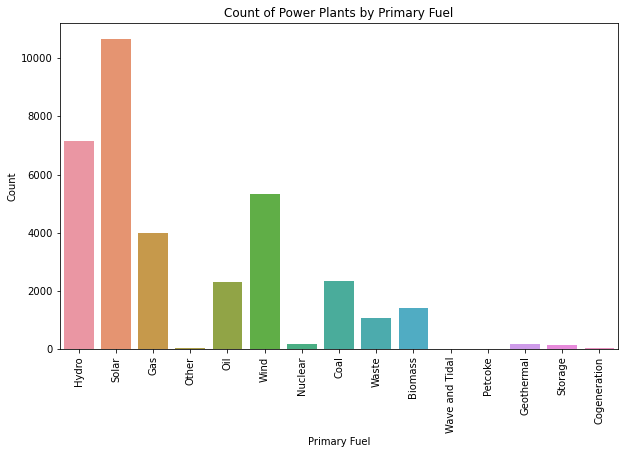

In [43]:
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='primary_fuel')
plt.title('Count of Power Plants by Primary Fuel')
plt.xlabel('Primary Fuel')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

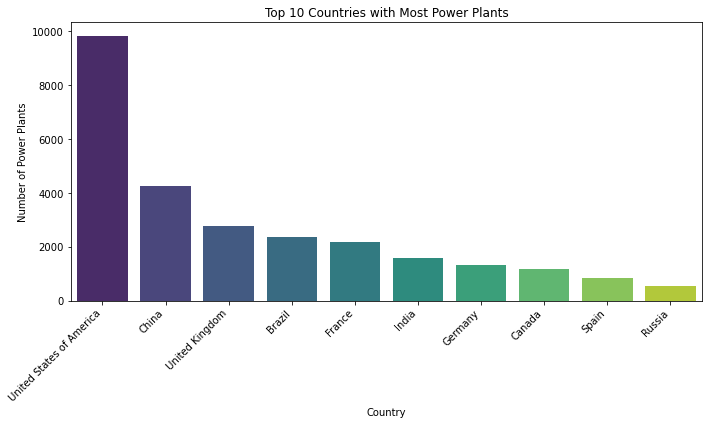

In [44]:
# Count the number of power plants for each country
country_plant_count = combined_df['country'].value_counts()

# Sort the countries based on the count of power plants
country_plant_count_sorted = country_plant_count.sort_values(ascending=False)

# Get the top 10 countries with the most power plants
top_10_countries = country_plant_count_sorted.head(10)

# Plotting the top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')
plt.title('Top 10 Countries with Most Power Plants')
plt.xlabel('Country')
plt.ylabel('Number of Power Plants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

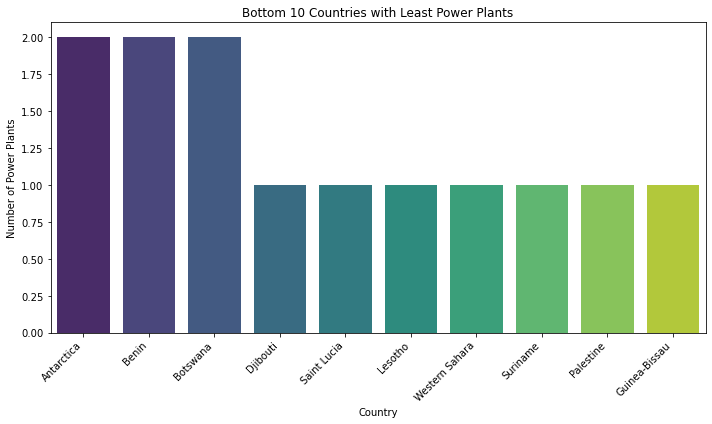

In [45]:
# Get the bottom 10 countries with the least power plants
bottom_10_countries = country_plant_count_sorted.tail(10)

# Plotting the bottom 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_10_countries.index, y=bottom_10_countries.values, palette='viridis')
plt.title('Bottom 10 Countries with Least Power Plants')
plt.xlabel('Country')
plt.ylabel('Number of Power Plants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

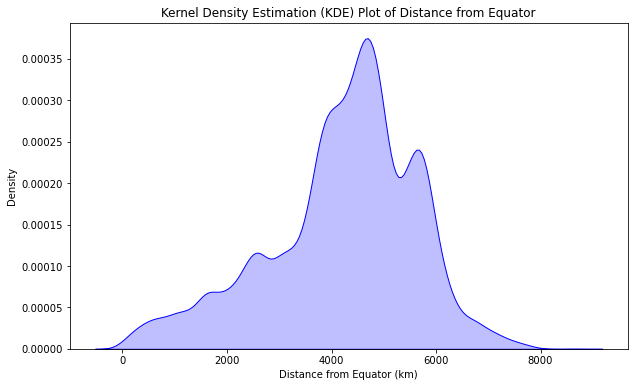

In [46]:
# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=combined_df, x='distance_from_equator', fill=True, color='blue')
plt.title('Kernel Density Estimation (KDE) Plot of Distance from Equator')
plt.xlabel('Distance from Equator (km)')
plt.ylabel('Density')
plt.show()

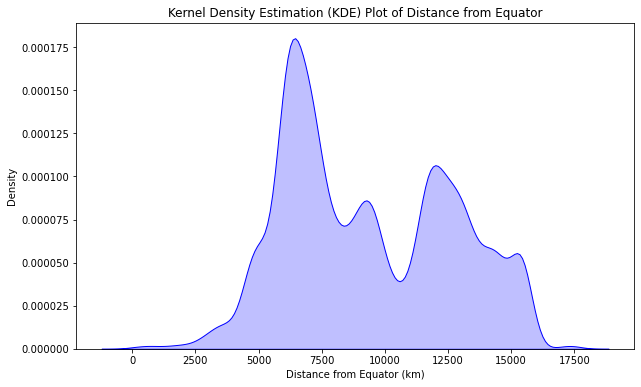

In [47]:
# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=combined_df, x='distance_from_nairobi', fill=True, color='blue')
plt.title('Kernel Density Estimation (KDE) Plot of Distance from Equator')
plt.xlabel('Distance from Equator (km)')
plt.ylabel('Density')
plt.show()

### (b) Bivariate Data Analysis

In [48]:
combined_df.columns

Index(['country', 'plant name', 'capacity_mw', 'primary_fuel', 'latitude',
       'longitude', 'fuel_Coal', 'fuel_Cogeneration', 'fuel_Gas',
       'fuel_Geothermal', 'fuel_Hydro', 'fuel_Nuclear', 'fuel_Oil',
       'fuel_Other', 'fuel_Petcoke', 'fuel_Solar', 'fuel_Storage',
       'fuel_Waste', 'fuel_Wave and Tidal', 'fuel_Wind', 'plant_name_length',
       'distance_from_equator', 'distance_from_nairobi'],
      dtype='object')

# country stats

In [49]:
country_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         167 non-null    object 
 1   num_plants      167 non-null    int64  
 2   avg_capacity    167 non-null    float64
 3   total_capacity  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


# univariate

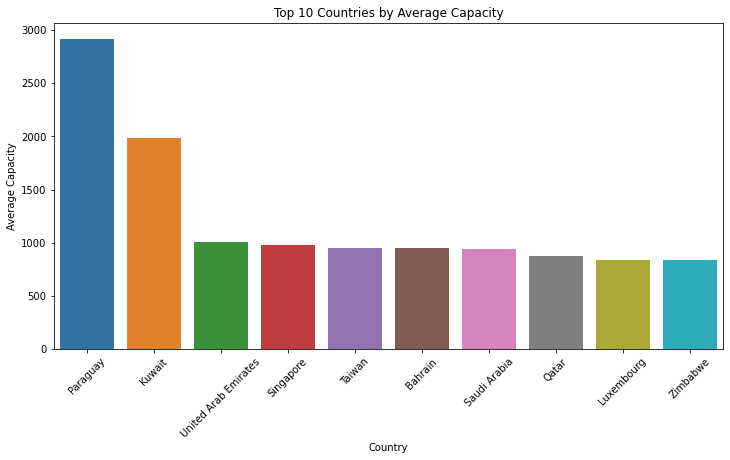

In [50]:
# Sort DataFrame based on average capacity
df_sorted_avg = country_stats.sort_values(by='avg_capacity', ascending=False)

# Get top and bottom 10 countries based on average capacity
top_10_avg = df_sorted_avg.head(10)
bottom_10_avg = df_sorted_avg.tail(10)

# Create bar plots for top and bottom 10 countries based on average capacity
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_avg, x='country', y='avg_capacity')
plt.title('Top 10 Countries by Average Capacity')
plt.xlabel('Country')
plt.ylabel('Average Capacity')
plt.xticks(rotation=45)
plt.show()

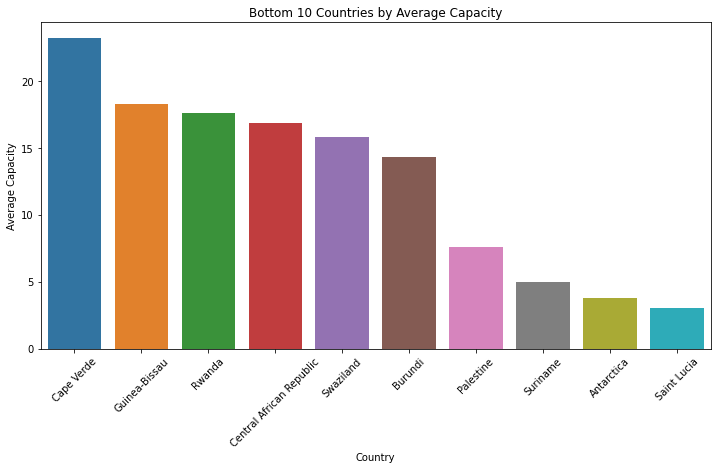

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_10_avg, x='country', y='avg_capacity')
plt.title('Bottom 10 Countries by Average Capacity')
plt.xlabel('Country')
plt.ylabel('Average Capacity')
plt.xticks(rotation=45)
plt.show()

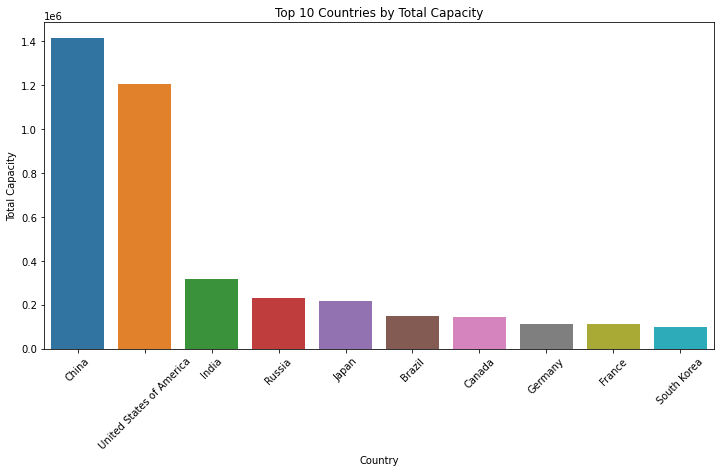

In [52]:
# Sort DataFrame based on total capacity
df_sorted_total = country_stats.sort_values(by='total_capacity', ascending=False)

# Get top and bottom 10 countries based on total capacity
top_10_total = df_sorted_total.head(10)
bottom_10_total = df_sorted_total.tail(10)

# Create bar plots for top and bottom 10 countries based on total capacity
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_total, x='country', y='total_capacity')
plt.title('Top 10 Countries by Total Capacity')
plt.xlabel('Country')
plt.ylabel('Total Capacity')
plt.xticks(rotation=45)
plt.show()

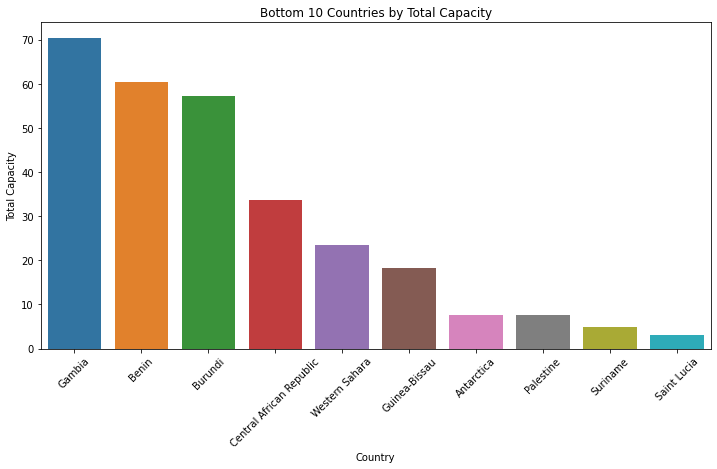

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_10_total, x='country', y='total_capacity')
plt.title('Bottom 10 Countries by Total Capacity')
plt.xlabel('Country')
plt.ylabel('Total Capacity')
plt.xticks(rotation=45)
plt.show()

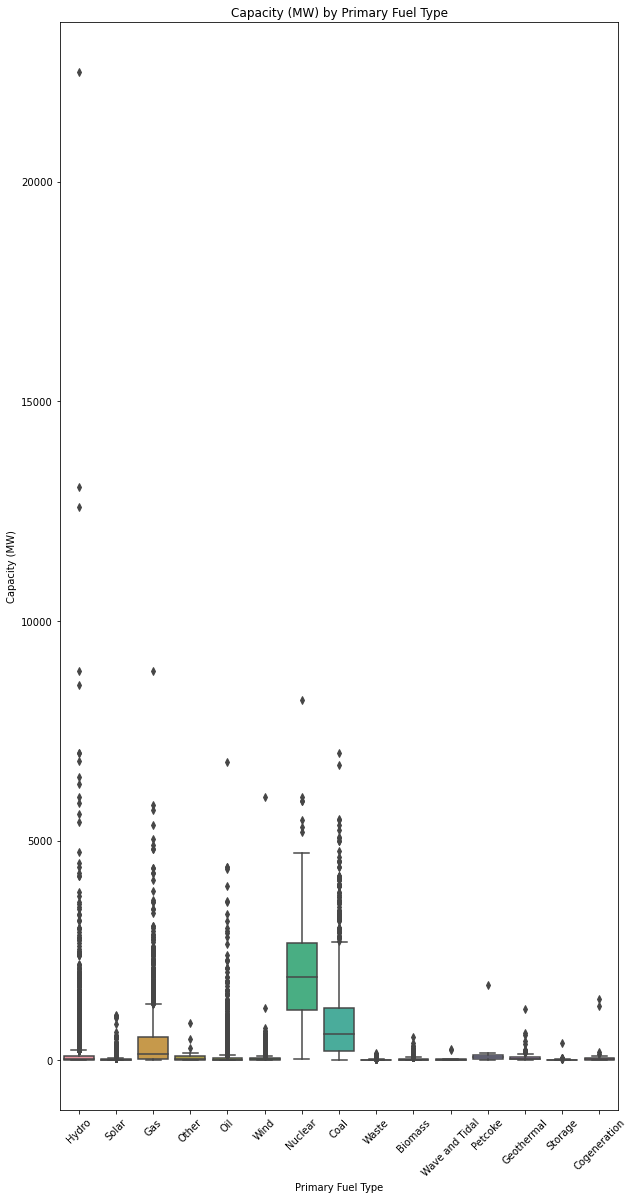

In [54]:
plt.figure(figsize=(10, 20))
sns.boxplot(data=combined_df, x='primary_fuel', y='capacity_mw')
plt.title('Capacity (MW) by Primary Fuel Type')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Capacity (MW)')
plt.xticks(rotation=45)
plt.show()

In [55]:
def plot_power_plant_distribution(df):
    # Create a GeoDataFrame from the DataFrame
    gdf = gpd.GeoDataFrame(combined_df, geometry=gpd.points_from_xy(combined_df.longitude, combined_df.latitude))

    # Load a world map shapefile for context
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Plot the power plant locations on top of the world map
    fig, ax = plt.subplots(figsize=(12, 8))
    world.boundary.plot(ax=ax, linewidth=1)
    gdf.plot(ax=ax, markersize=10, color='red', alpha=0.7, label='Power Plants')

    # Customize the plot (add title, legend, etc.)
    plt.title('Global Power Plant Distribution')
    plt.legend()
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Show the plot
    plt.show()

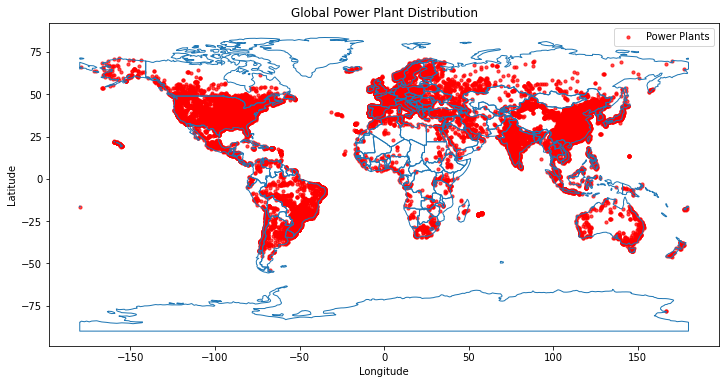

In [56]:
plot_power_plant_distribution(combined_df)

The visual representation of power plant locations worldwide is depicted in the distribution map. Each red marker on the map corresponds to the exact position of a power plant. Analyzing the spatial configuration of these markers reveals discernible patterns, concentrations, and disparities in the distribution of power plants. Regions with notable concentrations include North and South America, Europe, and Asia. Conversely, certain areas such as Africa, particularly Central Africa, as well as Northern Asia and Northern Europe, exhibit noticeable gaps in the distribution of power plants.

###### Prepping for modelling

In [57]:
# Save the DataFrame 'df_cleaned' to a CSV file named 'modelling.csv'
combined_df.to_csv('modelling.csv', index=False)

## 4. MODELLING 


In [58]:
modelling = pd.read_csv('modelling.csv')
modelling.head()

,country,plant name,capacity_mw,primary_fuel,latitude,longitude,fuel_Coal,fuel_Cogeneration,fuel_Gas,fuel_Geothermal,...,fuel_Other,fuel_Petcoke,fuel_Solar,fuel_Storage,fuel_Waste,fuel_Wave and Tidal,fuel_Wind,plant_name_length,distance_from_equator,distance_from_nairobi
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,Hydro,32.322,65.1190,0,0,0,0,...,0,0,0,0,0,0,0,44,3594.047496,4777.683993
1,Afghanistan,Kandahar DOG,10.0,Solar,31.670,65.7950,0,0,0,0,...,0,0,1,0,0,0,0,12,3521.548302,4770.977373
2,Afghanistan,Kandahar JOL,10.0,Solar,31.623,65.7920,0,0,0,0,...,0,0,1,0,0,0,0,12,3516.322133,4767.102632
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,Hydro,34.556,69.4787,0,0,0,0,...,0,0,0,0,0,0,0,45,3842.457313,5240.659212
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,Hydro,34.641,69.7170,0,0,0,0,...,0,0,0,0,0,0,0,48,3851.908895,5263.124565


In [59]:
modelling.columns

Index(['country', 'plant name', 'capacity_mw', 'primary_fuel', 'latitude',
       'longitude', 'fuel_Coal', 'fuel_Cogeneration', 'fuel_Gas',
       'fuel_Geothermal', 'fuel_Hydro', 'fuel_Nuclear', 'fuel_Oil',
       'fuel_Other', 'fuel_Petcoke', 'fuel_Solar', 'fuel_Storage',
       'fuel_Waste', 'fuel_Wave and Tidal', 'fuel_Wind', 'plant_name_length',
       'distance_from_equator', 'distance_from_nairobi'],
      dtype='object')

In [60]:
modelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                34936 non-null  object 
 1   plant name             34936 non-null  object 
 2   capacity_mw            34936 non-null  float64
 3   primary_fuel           34936 non-null  object 
 4   latitude               34936 non-null  float64
 5   longitude              34936 non-null  float64
 6   fuel_Coal              34936 non-null  int64  
 7   fuel_Cogeneration      34936 non-null  int64  
 8   fuel_Gas               34936 non-null  int64  
 9   fuel_Geothermal        34936 non-null  int64  
 10  fuel_Hydro             34936 non-null  int64  
 11  fuel_Nuclear           34936 non-null  int64  
 12  fuel_Oil               34936 non-null  int64  
 13  fuel_Other             34936 non-null  int64  
 14  fuel_Petcoke           34936 non-null  int64  
 15  fu

In [66]:
############################################################

# trial 1 million

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [63]:
numerical_columns = [
    'capacity_mw', 'latitude', 'longitude'
]

In [64]:
# Prepare the dataset for regression
X = modelling[numerical_columns].drop(['capacity_mw'], axis=1)
y = modelling['capacity_mw']

In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [66]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [67]:
# Calculate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 280290.49556166166


In [68]:
coefficients = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

           Coefficient
latitude     -0.055957
longitude     0.928990


In [65]:
######################################################

## Feature selection

In [61]:
#Dropping Columns 
modelling.drop(['primary_fuel', 'plant name', 'country'], axis=1,inplace=True)
modelling.head()

,capacity_mw,latitude,longitude,fuel_Coal,fuel_Cogeneration,fuel_Gas,fuel_Geothermal,fuel_Hydro,fuel_Nuclear,fuel_Oil,fuel_Other,fuel_Petcoke,fuel_Solar,fuel_Storage,fuel_Waste,fuel_Wave and Tidal,fuel_Wind,plant_name_length,distance_from_equator,distance_from_nairobi
0,33.0,32.322,65.1190,0,0,0,0,1,0,0,0,0,0,0,0,0,0,44,3594.047496,4777.683993
1,10.0,31.670,65.7950,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12,3521.548302,4770.977373
2,10.0,31.623,65.7920,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12,3516.322133,4767.102632
3,66.0,34.556,69.4787,0,0,0,0,1,0,0,0,0,0,0,0,0,0,45,3842.457313,5240.659212
4,100.0,34.641,69.7170,0,0,0,0,1,0,0,0,0,0,0,0,0,0,48,3851.908895,5263.124565


In [62]:
# correlation of modelling data
modelling.corr()

,capacity_mw,latitude,longitude,fuel_Coal,fuel_Cogeneration,fuel_Gas,fuel_Geothermal,fuel_Hydro,fuel_Nuclear,fuel_Oil,fuel_Other,fuel_Petcoke,fuel_Solar,fuel_Storage,fuel_Waste,fuel_Wave and Tidal,fuel_Wind,plant_name_length,distance_from_equator,distance_from_nairobi
capacity_mw,1.000000,-0.013218,0.151525,0.371376,-0.004524,0.154249,-0.014494,-0.016776,0.295086,-0.027495,-0.005688,0.001465,-0.197253,-0.019166,-0.054237,-0.003737,-0.099056,0.001464,-0.070385,-0.034353
latitude,-0.013218,1.000000,-0.068354,-0.000077,0.008495,-0.015420,-0.010613,-0.055648,0.019028,-0.216843,0.009669,-0.001672,0.143361,0.024889,0.050252,0.015083,0.073584,0.069643,0.753205,-0.059246
longitude,0.151525,-0.068354,1.000000,0.234445,-0.033056,-0.080430,-0.005315,0.009764,0.011076,-0.126001,-0.014187,-0.020126,0.052348,-0.056364,-0.072790,0.002207,0.002007,-0.011195,-0.125488,-0.639762
fuel_Coal,0.371376,-0.000077,0.234445,1.000000,-0.009163,-0.096096,-0.019715,-0.135675,-0.020027,-0.071295,-0.009384,-0.004955,-0.177201,-0.016649,-0.047470,-0.004523,-0.113599,0.114294,-0.051174,-0.061149
fuel_Cogeneration,-0.004524,0.008495,-0.033056,-0.009163,1.000000,-0.012322,-0.002528,-0.017397,-0.002568,-0.009142,-0.001203,-0.000635,-0.022722,-0.002135,-0.006087,-0.000580,-0.014567,0.015417,0.001772,0.035745
fuel_Gas,0.154249,-0.015420,-0.080430,-0.096096,-0.012322,1.000000,-0.026512,-0.182450,-0.026932,-0.095875,-0.012619,-0.006664,-0.238293,-0.022390,-0.063836,-0.006083,-0.152764,0.036839,-0.039662,0.101458
fuel_Geothermal,-0.014494,-0.010613,-0.005315,-0.019715,-0.002528,-0.026512,1.000000,-0.037432,-0.005525,-0.019670,-0.002589,-0.001367,-0.048889,-0.004593,-0.013097,-0.001248,-0.031341,-0.005323,-0.027119,0.031905
fuel_Hydro,-0.016776,-0.055648,0.009764,-0.135675,-0.017397,-0.182450,-0.037432,1.000000,-0.038025,-0.135362,-0.017817,-0.009408,-0.336438,-0.031611,-0.090128,-0.008588,-0.215683,-0.171353,-0.015854,-0.010377
fuel_Nuclear,0.295086,0.019028,0.011076,-0.020027,-0.002568,-0.026932,-0.005525,-0.038025,1.000000,-0.019981,-0.002630,-0.001389,-0.049663,-0.004666,-0.013304,-0.001268,-0.031838,-0.036906,0.015512,-0.002698
fuel_Oil,-0.027495,-0.216843,-0.126001,-0.071295,-0.009142,-0.095875,-0.019670,-0.135362,-0.019981,1.000000,-0.009363,-0.004944,-0.176793,-0.016611,-0.047361,-0.004513,-0.113338,-0.031235,-0.164099,0.079590
